In [1]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Download the VADER lexicon (if not already downloaded)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\India\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Load Elon Musk's tweets from the CSV file
df = pd.read_csv('Elon_musk.csv', encoding='ISO-8859-1')

In [4]:
# Create empty lists to store sentiment scores
compound_scores = []
positive_scores = []
negative_scores = []


In [5]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [6]:
# Analyze each tweet and append sentiment scores to the lists
for tweet in df['Text']:
    sentiment = sia.polarity_scores(tweet)
    compound_scores.append(sentiment['compound'])
    positive_scores.append(sentiment['pos'])
    negative_scores.append(sentiment['neg'])

In [7]:
# Add sentiment scores to the DataFrame
df['Compound_Score'] = compound_scores
df['Positive_Score'] = positive_scores
df['Negative_Score'] = negative_scores

In [8]:
# Classify sentiment based on compound score
df['Sentiment'] = df['Compound_Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [9]:
# Display the DataFrame with sentiment scores
print(df[['Text', 'Sentiment']])


                                                   Text Sentiment
0                                @kunalb11 Im an alien   Neutral
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   Neutral
2                   @joerogan @Spotify Great interview!  Positive
3                       @gtera27 Doge is underestimated  Negative
4     @teslacn Congratulations Tesla China for amazi...  Positive
...                                                 ...       ...
1994  @flcnhvy True, it sounds so surreal, but the n...  Negative
1995  @PPathole Make sure to read ur terms &amp; con...  Positive
1996                @TeslaGong @PPathole Samwise Gamgee   Neutral
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...  Negative
1998                          Progress update August 28  Positive

[1999 rows x 2 columns]


In [10]:
data = pd.DataFrame(df)

In [11]:
# Count the number of tweets for each sentiment
sentiment_counts = data['Sentiment'].value_counts()

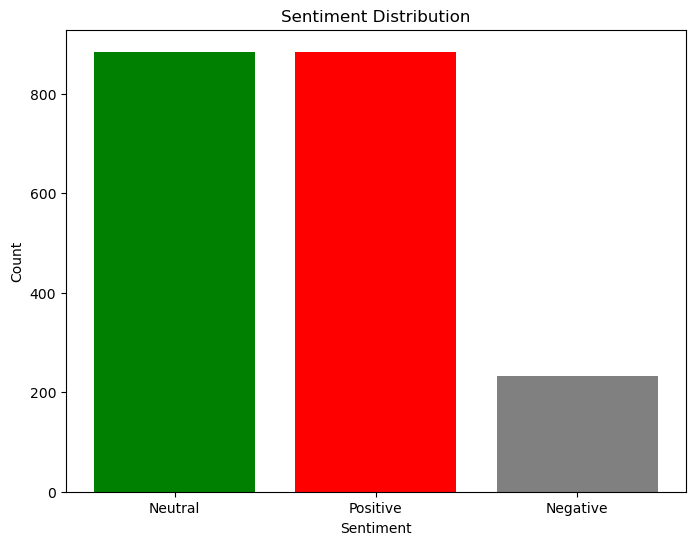

In [12]:
# Create a bar plot to visualize sentiment distribution
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

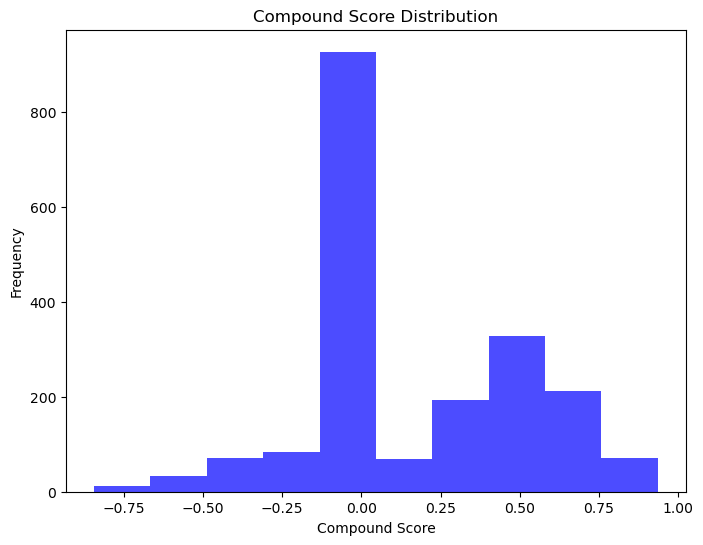

In [13]:
# Create a histogram to visualize compound score distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Compound_Score'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.title('Compound Score Distribution')
plt.show()

In [14]:
import matplotlib.pyplot as plt

In [18]:
# Sample sentiment distribution (replace with your actual data)
sentiments = ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative']

In [19]:
# Count the number of tweets for each sentiment
sentiment_counts = {
    'Positive': sentiments.count('Positive'),
    'Negative': sentiments.count('Negative'),
    'Neutral': sentiments.count('Neutral')
}

In [20]:
# Convert sentiment_counts values to a list
sizes = list(sentiment_counts.values())

In [21]:
# Define other variables
labels = sentiment_counts.keys()
colors = ['green', 'red', 'gray']
explode = (0.1, 0, 0)

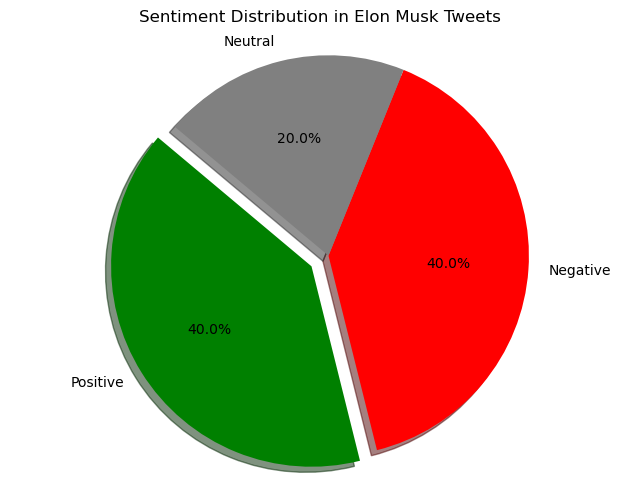

In [22]:
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution in Elon Musk Tweets')
plt.show()

In [23]:
import pandas as pd
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [26]:
# Load Elon Musk's tweets from the CSV file
df = pd.read_csv('Elon_musk.csv', encoding='ISO-8859-1')

In [27]:
# Text preprocessing
def preprocess_text(text):
    # Remove special characters and links
    text = text.replace("RT", "").replace("@", "").replace(":", "").replace("\n", "").replace("https://", "").replace("U+0001F923", "").strip()
    # Convert to lowercase
    text = text.lower()
    return text

data["Text"] = data["Text"].apply(preprocess_text)

In [28]:
# Sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

data["Sentiment"] = data["Text"].apply(analyze_sentiment)

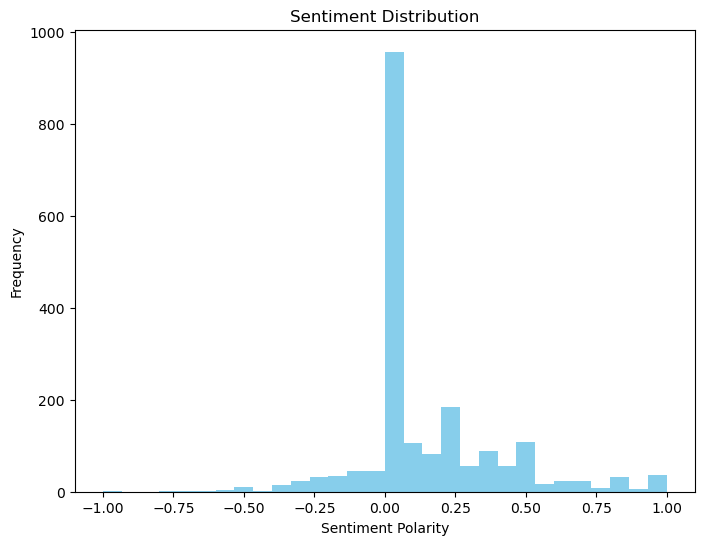

In [29]:
# Sentiment distribution
plt.figure(figsize=(8, 6))
data["Sentiment"].plot(kind="hist", bins=30, color="skyblue")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\India\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
from nltk.corpus import stopwords

# Get a list of English stopwords
stop_words = set(stopwords.words('english'))

In [33]:
# Function to generate a word cloud while filtering out stopwords
def generate_word_cloud(text):
    # Split the text into words
    words = text.split()
    # Filter out stopwords
    words = [word for word in words if word.lower() not in stop_words]
    # Join the words back into a single string
    cleaned_text = " ".join(words)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(cleaned_text)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title("Word Cloud for Elon Musk's Tweets (Without Stopwords)")
    plt.axis("off")
    plt.show()

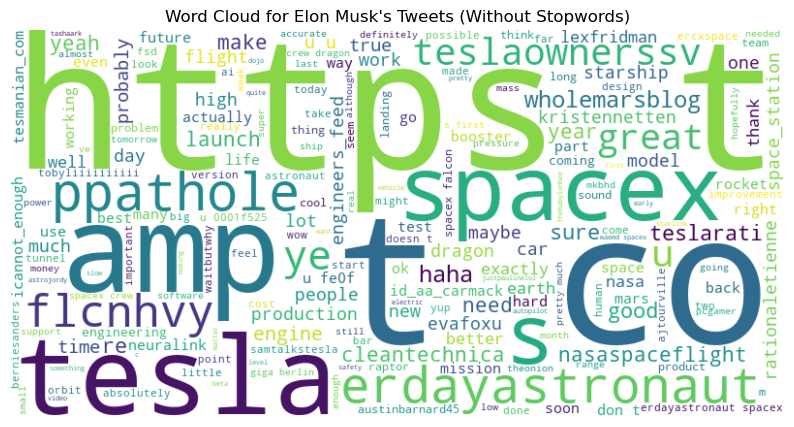

In [34]:
# Use the function to generate the word cloud
generate_word_cloud(" ".join(data["Text"]))

In [35]:
# Example: Frequency of mentions of "Tesla" in tweets
tesla_mentions = data[data["Text"].str.contains("tesla")]
print("Number of tweets mentioning Tesla:", len(tesla_mentions))

Number of tweets mentioning Tesla: 335


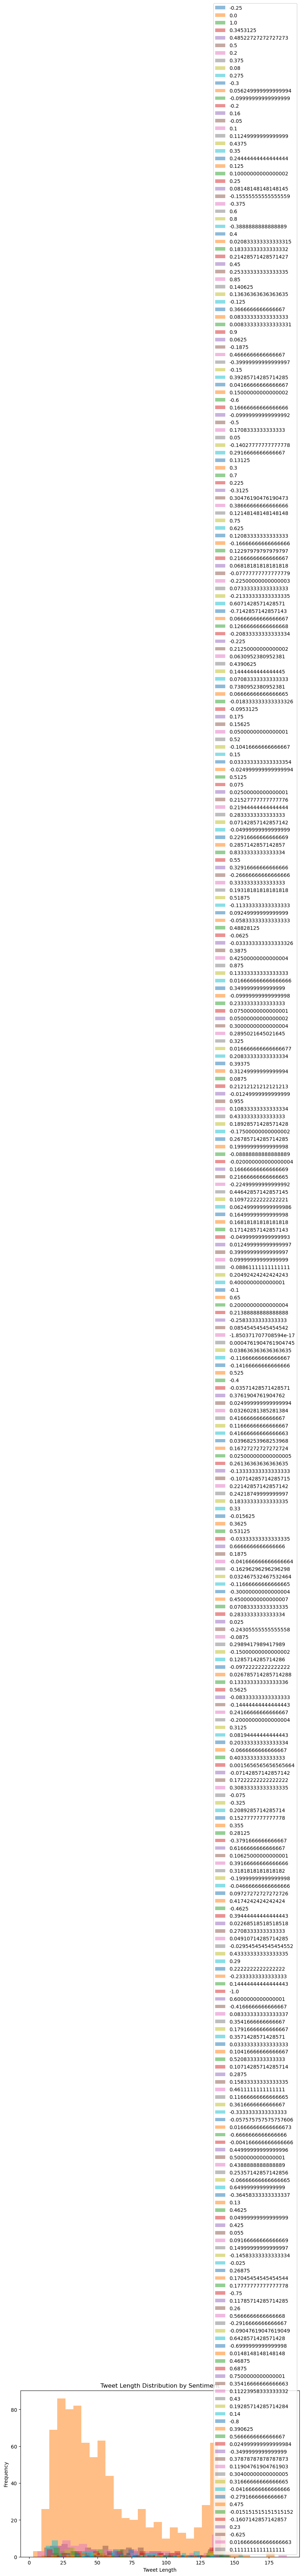

In [40]:
# Tweet length distribution by sentiment
plt.figure(figsize=(10, 6))
for sentiment in data["Sentiment"].unique():
    subset = data[data["Sentiment"] == sentiment]
    plt.hist(subset["Text"].apply(len), bins=30, alpha=0.5, label=sentiment)
plt.title("Tweet Length Distribution by Sentiment")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()

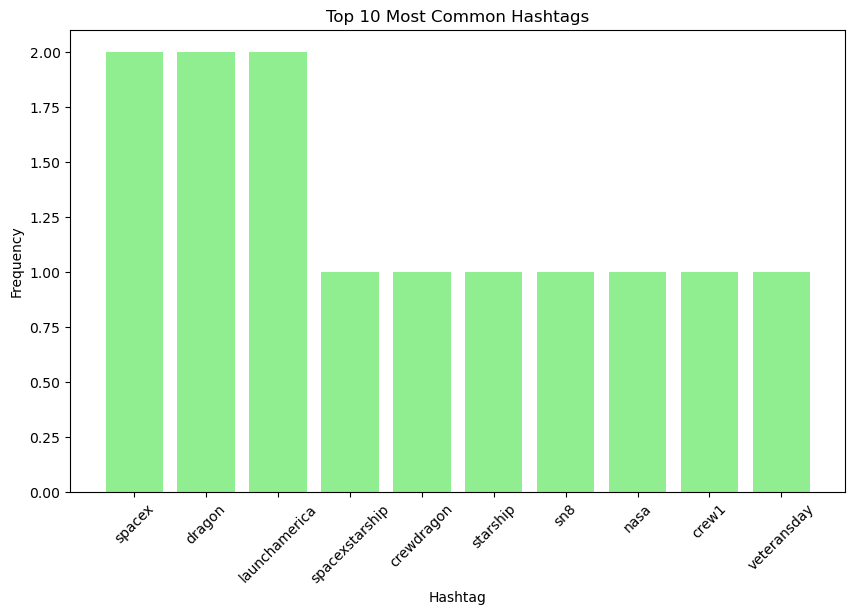

In [41]:
import re

# Extract hashtags from tweets
hashtags = data["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
hashtags = [hashtag for sublist in hashtags for hashtag in sublist]  # Flatten the list

# Count and visualize the most common hashtags
from collections import Counter
top_hashtags = Counter(hashtags).most_common(10)
plt.figure(figsize=(10, 6))
plt.bar([item[0] for item in top_hashtags], [item[1] for item in top_hashtags], color="lightgreen")
plt.title("Top 10 Most Common Hashtags")
plt.xlabel("Hashtag")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

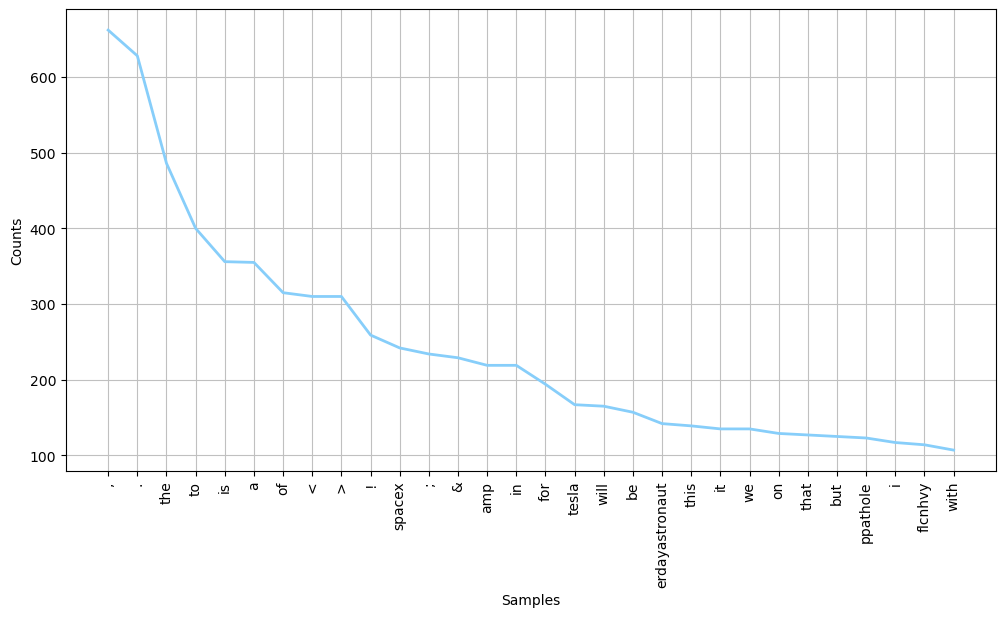

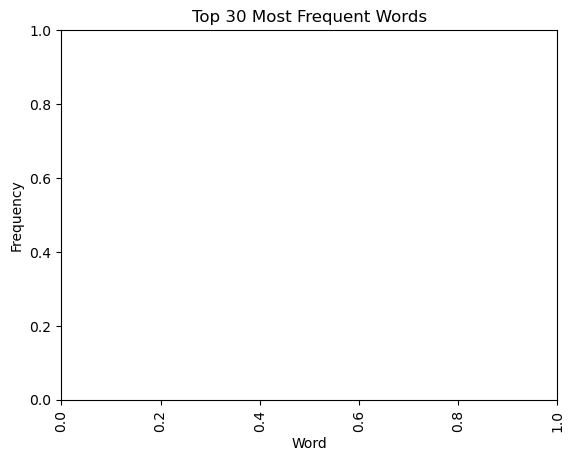

In [42]:
from nltk.probability import FreqDist

# Tokenize the text and compute word frequencies
tokens = nltk.word_tokenize(" ".join(data["Text"]))
fdist = FreqDist(tokens)

# Plot the most common words
plt.figure(figsize=(12, 6))
fdist.plot(30, cumulative=False, color="lightskyblue")
plt.title("Top 30 Most Frequent Words")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

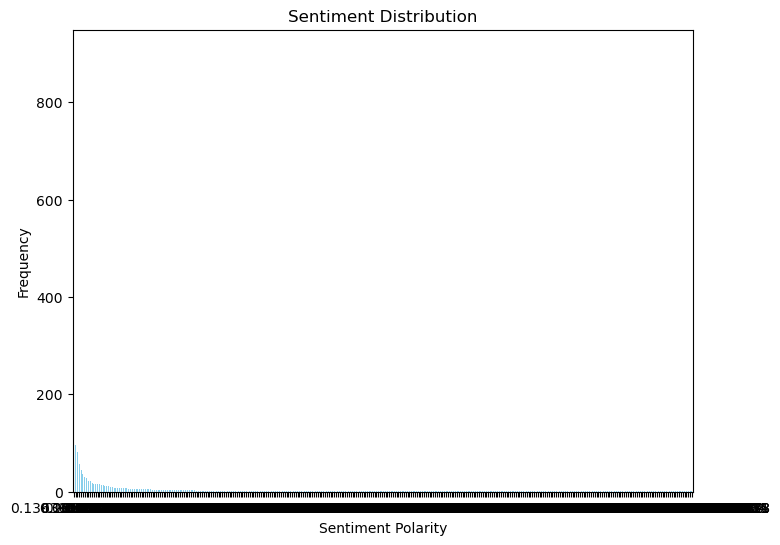

In [36]:
# Bar chart of sentiment distribution
sentiment_counts = data["Sentiment"].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind="bar", color="skyblue")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

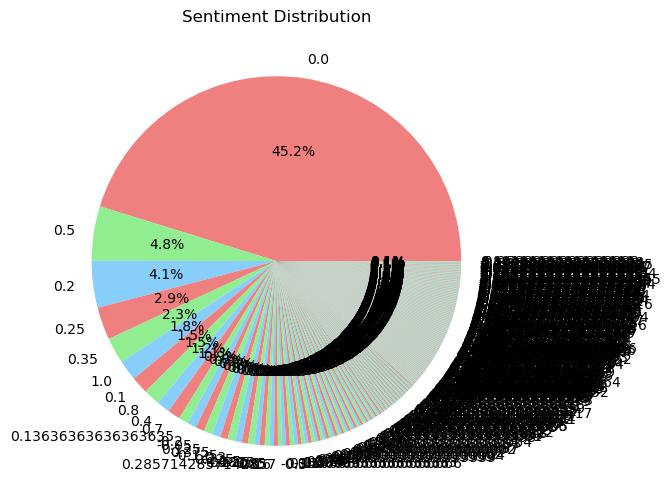

In [37]:
# Pie chart of sentiment distribution
sentiment_counts = data["Sentiment"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", colors=["lightcoral", "lightgreen", "lightskyblue"])
plt.title("Sentiment Distribution")
plt.show()

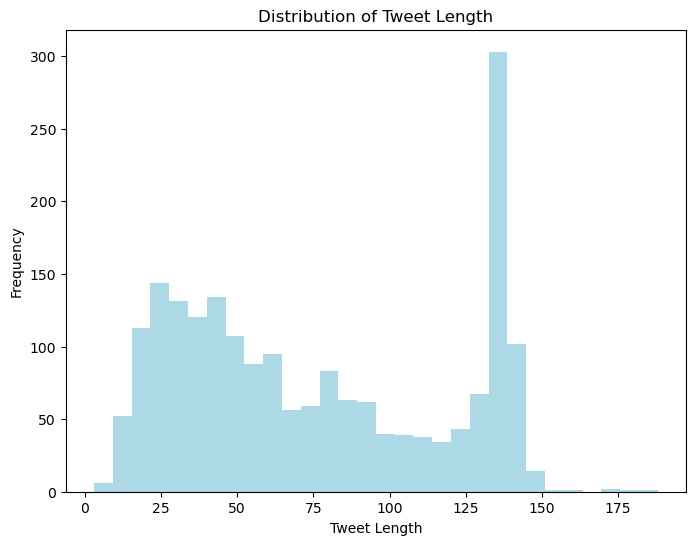

In [38]:
# Histogram of tweet length
tweet_lengths = data["Text"].apply(len)
plt.figure(figsize=(8, 6))
plt.hist(tweet_lengths, bins=30, color="lightblue")
plt.title("Distribution of Tweet Length")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.show()